<a href="https://colab.research.google.com/github/Anggarciaar/Proyecto_AnalisisGeoespacial/blob/main/Vecindades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pip install osmnx

##Choroplets

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt


In [1]:
import geopandas
import numba
import numpy
print('Geopandas version:', geopandas.__version__)
print('Numba version:', numba.__version__)
print('NumPy version:', numpy.__version__)


Geopandas version: 0.13.2
Numba version: 0.57.1
NumPy version: 1.24.4


In [6]:
import geopandas as gpd

In [12]:
!pip install contextily
import contextily as ctx

In [7]:
#Upload the files you will work with

#Import crashes
db = gpd.read_file('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Emisiones SSJ.shp')

#Import comunas
c = gpd.read_file('/content/drive/MyDrive/DATA_ProyectoAG/Vecindades/despartamento_.shp')

#Import neighborhoods
b = gpd.read_file('/content/drive/MyDrive/DATA_ProyectoAG/Vecindades/Municipios.shp')

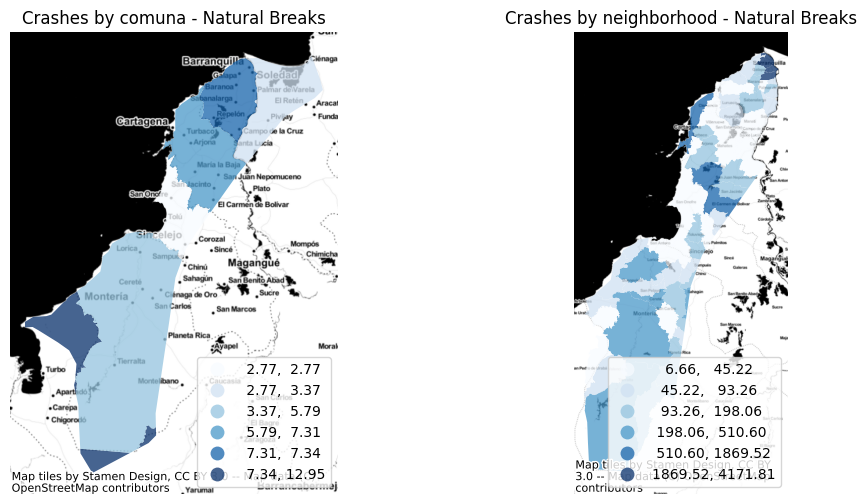

In [33]:
#Plot the crashes by comunas and neighborhoods of Medellin

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax1, ax2 = axs

c.plot(column='ems_nts_GE',
       cmap='Blues',
       scheme='naturalbreaks',
       k=6,
       edgecolor='white',
       linewidth=0,
       alpha=0.75,
       legend=True,
       ax=ax1,
       legend_kwds={'loc':4})

ax1.set_axis_off()
ax1.set_title('Crashes by comuna - Natural Breaks')

ctx.add_basemap(ax1,
                crs=c.crs,
                source=ctx.providers.Stamen.Toner)

b.plot(column='Emisiones',
       cmap='Blues',
       scheme='naturalbreaks',
       k=6,
       edgecolor='white',
       linewidth=0,
       alpha=0.75,
       legend=True,
       ax=ax2,

       legend_kwds={'loc':4})

ax2.set_axis_off()
ax2.set_title('Crashes by neighborhood - Natural Breaks')

ctx.add_basemap(ax2,
                crs=b.crs,
                source=ctx.providers.Stamen.Toner)
plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Vecindades1.png')

In [26]:
#Compute crash density for each approach
#Use projected coordinates EPSG:3116 Magna-Sirgas

#By comuna
c['area_sqkm'] = c.to_crs(epsg=3116).area*1e-6

c['crash_density'] = c['ems_nts_GE']/c['area_sqkm']

#By neighborhood
b['area_sqkm'] = b.to_crs(epsg=3116).area*1e-6

b['crash_density'] = b['Emisiones']/b['area_sqkm']

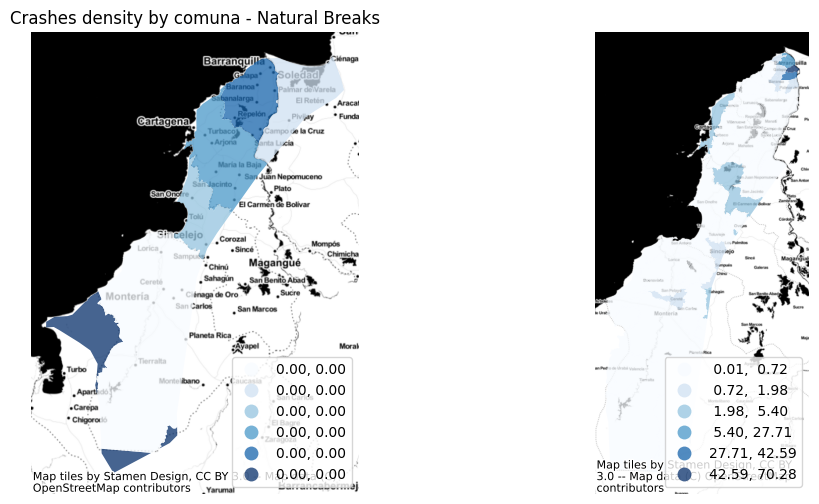

In [32]:
#Plot the density of crashes by comunas and neighborhoods of Medellin

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax1, ax2 = axs

c.plot(column='crash_density',
       cmap='Blues',
       scheme='naturalbreaks',
       k=6,
       edgecolor='white',
       linewidth=0,
       alpha=0.75,
       legend=True,
       ax=ax1,
       legend_kwds={'loc':4})

ax1.set_axis_off()
ax1.set_title('Crashes density by comuna - Natural Breaks')

ctx.add_basemap(ax1,
                crs=c.crs,
                source=ctx.providers.Stamen.Toner)

b.plot(column='crash_density',
       cmap='Blues',
       scheme='naturalbreaks',
       k=6,
       edgecolor='white',
       linewidth=0,
       alpha=0.75,
       legend=True,
       ax=ax2,
       legend_kwds={'loc':4})

ax2.set_axis_off()


ctx.add_basemap(ax2,
                crs=b.crs,
                source=ctx.providers.Stamen.Toner)
plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Vecindades2.png')